"C = KMeans(k,xt,Cx)\n\nplt.figure(2)\n\nfor kx in C.keys():\n    pts = arr(C[kx]['points'])\n    plt.scatter(pts[:,0], pts[:,1], color = colours[kx])\n    \nfor kx in C.keys():\n    plt.scatter(C[kx]['center'][0], C[kx]['center'][1], color = 'black')\n"

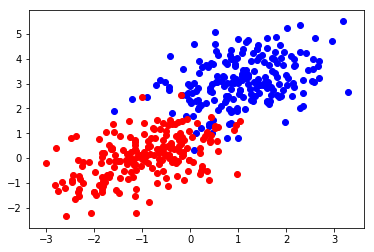

In [16]:
import numpy as np
from numpy import array as arr
from matplotlib import pyplot as plt
%matplotlib inline

# In[181]:

mean_01 = np.array([1.0, 3.0])
mean_02 = np.array([-1.0, 0.0])

cov_01 = np.array([[0.8, 0.3], [0.3, 0.9]])
cov_02 = np.array([[0.9, 0.4], [0.4, 0.8]])

d1 = np.random.multivariate_normal(mean_01, cov_01, 200)
d2 = np.random.multivariate_normal(mean_02, cov_02, 200)

plt.figure(0)
plt.scatter(d1[:,0], d1[:,1], color = 'blue')
plt.scatter(d2[:,0], d2[:,1], color = 'red')


# In[182]:
xt = np.zeros((d1.shape[0]+d2.shape[0],d1.shape[1]))
xt[:d1.shape[0]] = d1[:]
xt[d2.shape[0]:] = d2[:]

inf = float('inf')


# In[183]:
def cost(x,y):
    return np.sqrt(((x-y)**2).sum())


# In[184]:
def createDict(k, xt=None, centers=None):
    #If we're already given a numpy array of centers, create a dictionary of those centers 
    if type(centers) != type(None):
        C = dict()
        for kx in range(k):
            cluster = {
                        'center': centers[kx],
                        'points': []
                      } 
            C[kx] = cluster
        return C
    
    
    #Else create a dictionary within the range of max and min of xt
    C = dict()
    minv, maxv = xt.min(), xt.max()
    centers = np.random.uniform(low = minv, high = maxv, size = (k,xt.shape[1]))
    for kx in range(k):
        cluster = {
                    'center':centers[kx,:],
                    'points':[]
                  } 
        C[kx] = cluster
    return C

# In[185]:
def clusterize(k, xt, C):
    #Takes all the points of the cluster and assign them to their respective centers, then return a dictionary with points
    for point in xt:
        kv,kc = 1000000,-1
        #print point
        for kx in range(k):
            cst = cost(point, C[kx]['center'])
            #print ">", kx, ":", cst
            if cst < kv:
                kv = cst
                kc = kx
        #print ">>", kc
        C[kc]['points'].append(point)
    
    return C

# In[188]:
def updateCenters(k,xt,C):
    #Update the value of centers, return the new k and dictionary without points
    means = []
    for kx in range(k):
        if len(C[kx]['points']) == 0:
            pass
        else:
            means.append(np.mean(C[kx]['points'], axis=0))
    C = createDict(k,arr(means))
    return C


# In[187]:
colours = ['red','blue', 'green', 'pink']

def KMeans(k, xt, C=None, iter=100, plot=True, delay = False):
    if type(C) == type(None):
        C = createDict(k,xt)
        
    for it in range(1,iter):
        C = clusterize(k,xt,C)
        C = updateCenters(k,xt,C)
    
    C = clusterize(k,xt,C)
    print k
    for kx in range(k):
        pass
        #plt.scatter(C[kx]['center'][0], C[kx]['center'][0], color = 'black')
        #plt.figure(kx+1)
        #plt.scatter(arr(C[0]['points'])[:,0], arr(C[kx]['points'])[:,1], color = colours[kx])
    return C     

k=2
centers = [[2.0,2.0],[-1.0,0.0]]
Cx = createDict(k, centers=arr(centers)) 
"""C = KMeans(k,xt,Cx)

plt.figure(2)

for kx in C.keys():
    pts = arr(C[kx]['points'])
    plt.scatter(pts[:,0], pts[:,1], color = colours[kx])
    
for kx in C.keys():
    plt.scatter(C[kx]['center'][0], C[kx]['center'][1], color = 'black')
"""

In [17]:
B = createDict(k, centers=arr(centers)) 

[ 2.  2.]
[-1.  0.]


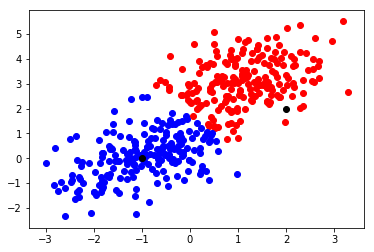

In [18]:
B = clusterize(k,xt,B)
plt.figure(3)

for kx in B.keys():
    pts = arr(B[kx]['points'])
    plt.scatter(pts[:,0], pts[:,1], color = colours[kx])
    
for kx in B.keys():
    plt.scatter(B[kx]['center'][0], B[kx]['center'][1], color = 'black')
    print B[kx]['center']

[ 3.01719017  2.06340637]
[-0.56935826  1.07951997]


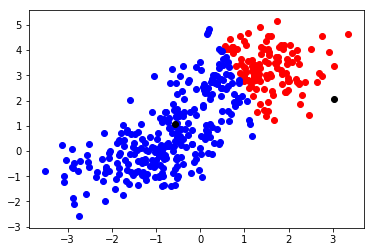

In [13]:
B = clusterize(k,xt,B)
plt.figure(3)

for kx in B.keys():
    pts = arr(B[kx]['points'])
    plt.scatter(pts[:,0], pts[:,1], color = colours[kx])
    
for kx in B.keys():
    plt.scatter(B[kx]['center'][0], B[kx]['center'][1], color = 'black')
    print B[kx]['center']

In [ ]:
B = updateCenters(k,xt,B)
B = clusterize(k,xt,B)